# 공공 인공지능 API

## 객체 검출

In [2]:
with open('../static/data/etri_key.txt') as f:
    eai_key = f.read(100)

In [3]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [4]:
import os
image_file = '../static/upload/다운로드.jpg'
_, image_type = os.path.splitext(image_file)
image_type = '.jpg' if image_type == '.jpg' else '.jfif'
image_type

'.jpg'

In [5]:
with open(image_file,'rb') as f:
    imageContents = base64.b64encode(f.read()).decode("utf8")

In [6]:
request_json = {
    "access_key": eai_key,
    "argument": {
        "type": image_type[1:],
        "file": imageContents
    }
}
 

In [7]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [8]:
response.status

200

In [9]:
response.data

b'{"result":0,"return_object":{"data":[{"class":"car","confidence":"0.998960","x":"522","y":"433","width":"187","height":"59"},{"class":"car","confidence":"0.998350","x":"279","y":"70","width":"186","height":"57"},{"class":"car","confidence":"0.997843","x":"521","y":"64","width":"191","height":"64"},{"class":"car","confidence":"0.997090","x":"284","y":"434","width":"176","height":"58"},{"class":"car","confidence":"0.997069","x":"46","y":"62","width":"153","height":"65"},{"class":"car","confidence":"0.996892","x":"275","y":"249","width":"190","height":"64"},{"class":"car","confidence":"0.995947","x":"525","y":"246","width":"179","height":"67"},{"class":"car","confidence":"0.995626","x":"25","y":"253","width":"186","height":"55"},{"class":"car","confidence":"0.995215","x":"29","y":"428","width":"180","height":"66"}]}}'

In [10]:
import json
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'car',
    'confidence': '0.998960',
    'x': '522',
    'y': '433',
    'width': '187',
    'height': '59'},
   {'class': 'car',
    'confidence': '0.998350',
    'x': '279',
    'y': '70',
    'width': '186',
    'height': '57'},
   {'class': 'car',
    'confidence': '0.997843',
    'x': '521',
    'y': '64',
    'width': '191',
    'height': '64'},
   {'class': 'car',
    'confidence': '0.997090',
    'x': '284',
    'y': '434',
    'width': '176',
    'height': '58'},
   {'class': 'car',
    'confidence': '0.997069',
    'x': '46',
    'y': '62',
    'width': '153',
    'height': '65'},
   {'class': 'car',
    'confidence': '0.996892',
    'x': '275',
    'y': '249',
    'width': '190',
    'height': '64'},
   {'class': 'car',
    'confidence': '0.995947',
    'x': '525',
    'y': '246',
    'width': '179',
    'height': '67'},
   {'class': 'car',
    'confidence': '0.995626',
    'x': '25',
    'y': '253',
    'width': '186',
   

In [11]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
image = Image.open(image_file)

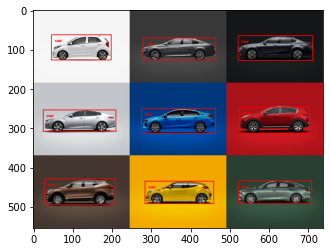

In [16]:
data_list = result['return_object']['data']
draw = ImageDraw.Draw(image)
names = []
for data in data_list:
    name = data['class']
    names.append(name)
    x = int(data['x'])
    y = int(data['y'])
    w = int(data['width'])
    h = int(data['height'])
    draw.text((x+10,y+10), name, fill=(255,0,0))
    draw.rectangle(((x,y),(x+w,y+h)),outline=(255,0,0),width=2)
plt.imshow(image)

In [20]:
names

['car', 'car', 'car', 'car', 'car', 'car', 'car', 'car', 'car']

In [17]:
image.save('../static/upload/etri'+image_type)